# Titanic - Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mplcatppuccin
import matplotlib as mpl
import vapeplot
import mplcyberpunk


mpl.style.use('mocha')

pd.options.display.max_columns=500

### Load data into Pandas DataFrame

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Check dtypes of both dataframes

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### There are some columns/variables which show missing values

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Let's show the previous information using the library missingno

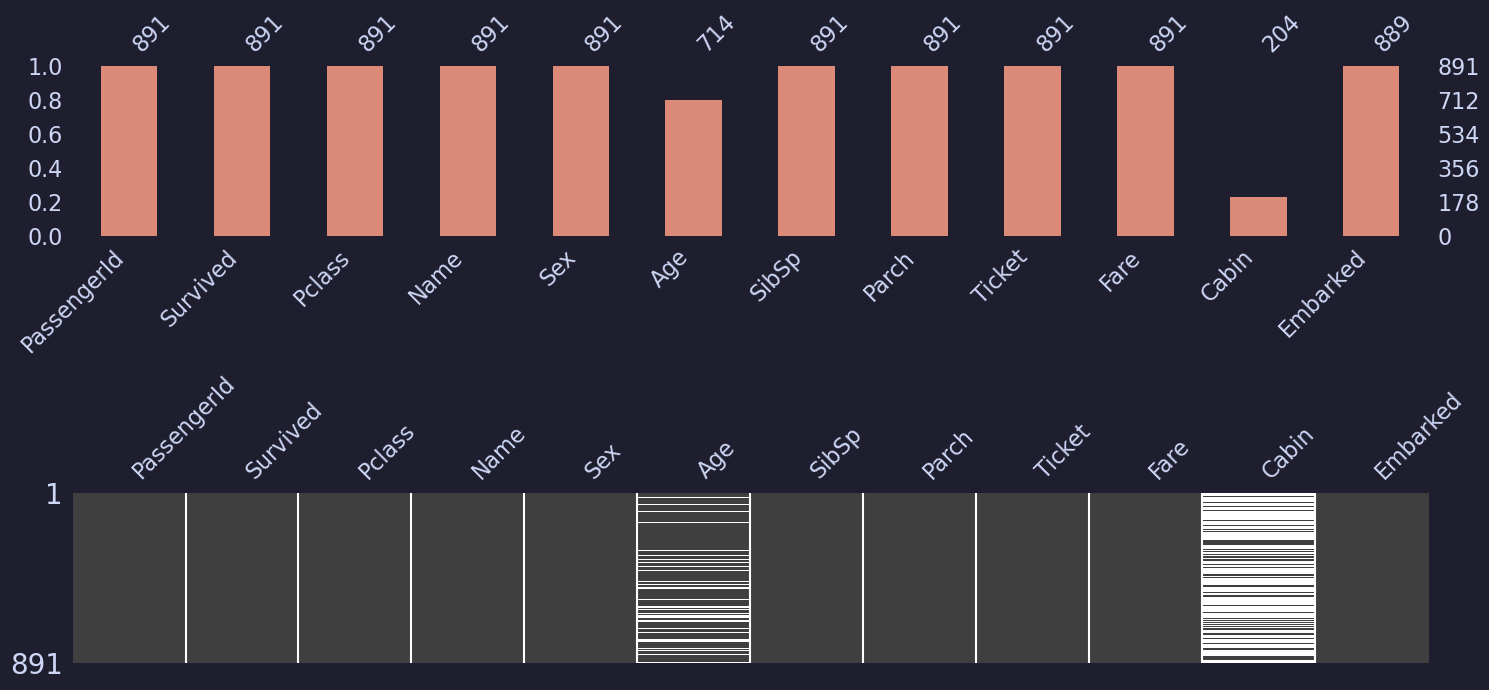

In [9]:
import missingno as msno

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
msno.bar(train_df, color='#dc8a78', ax=axs[0])
msno.matrix(train_df, ax=axs[1], sparkline=False)
plt.tight_layout()
plt.show()


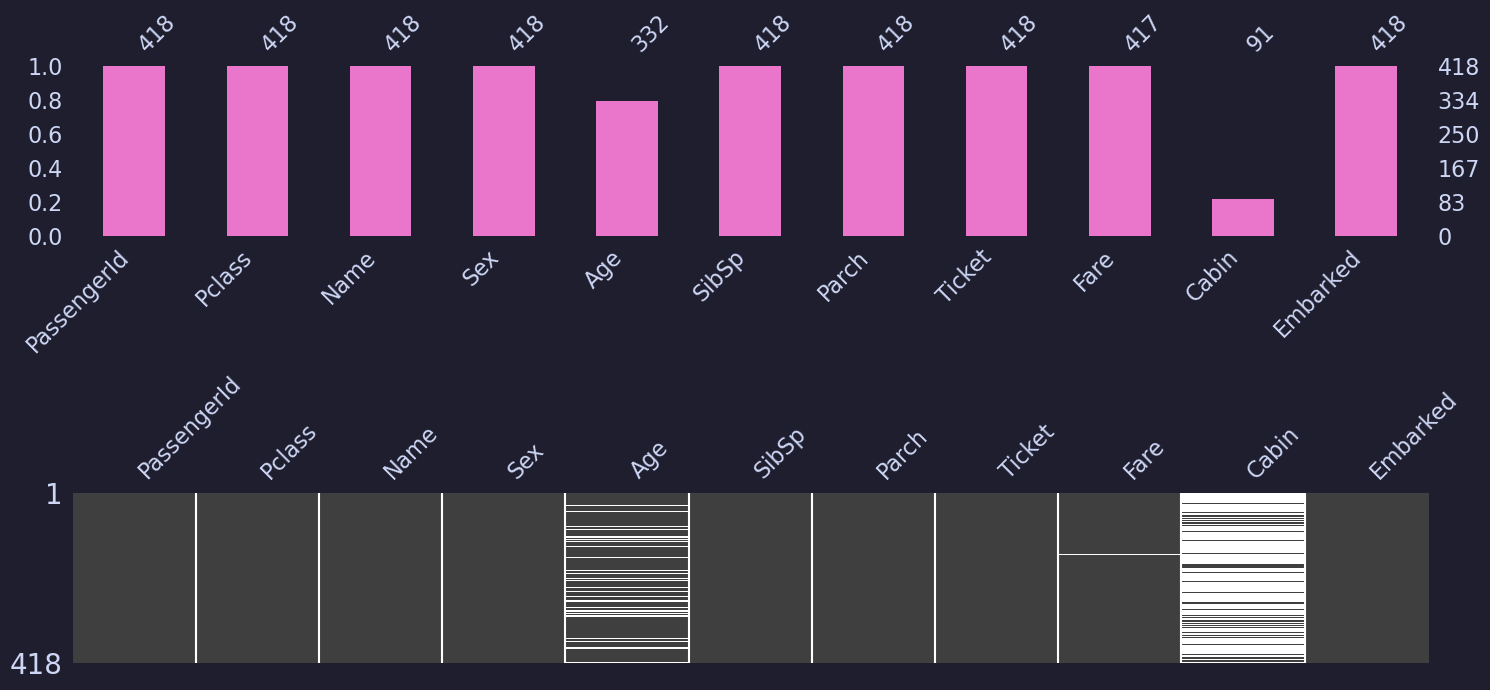

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
msno.bar(test_df, color='#ea76cb', ax=axs[0])
msno.matrix(test_df, ax=axs[1], sparkline=False)
plt.tight_layout()
plt.show()

## EDA & Feature Engineering

### Check total of people whom survived per various columns

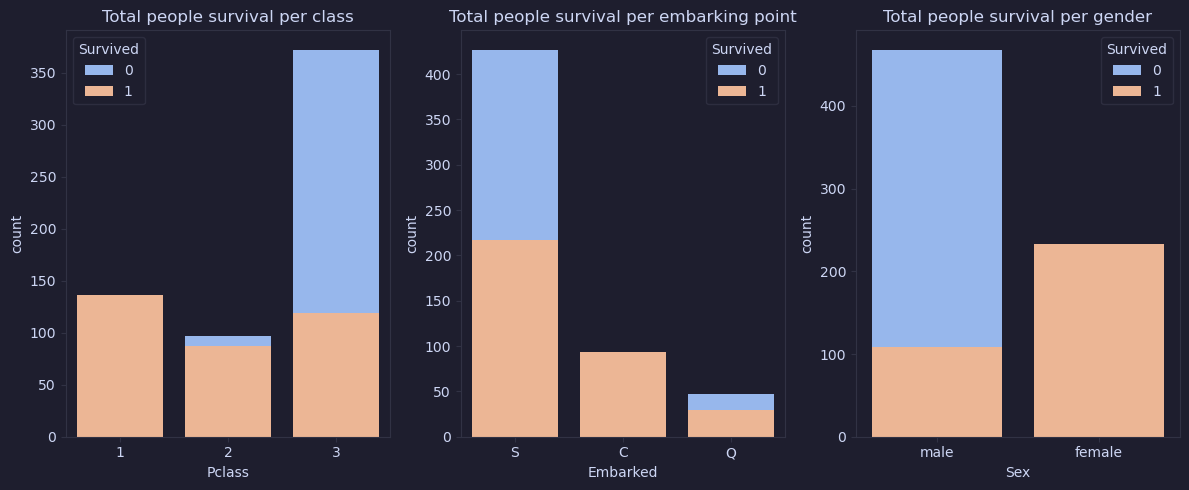

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.countplot(data=train_df, x='Pclass', hue='Survived', dodge=False, ax=axs[0])
sns.countplot(data=train_df, x='Embarked', hue='Survived', dodge=False, ax=axs[1])
sns.countplot(data=train_df, x='Sex', hue='Survived', dodge=False, ax=axs[2])
axs[0].set_title('Total people survival per class')
axs[1].set_title('Total people survival per embarking point')
axs[2].set_title('Total people survival per gender')
plt.tight_layout()
plt.show()


### Check size of the families in the Titanic

Text(0.5, 1.0, 'Parents per Children')

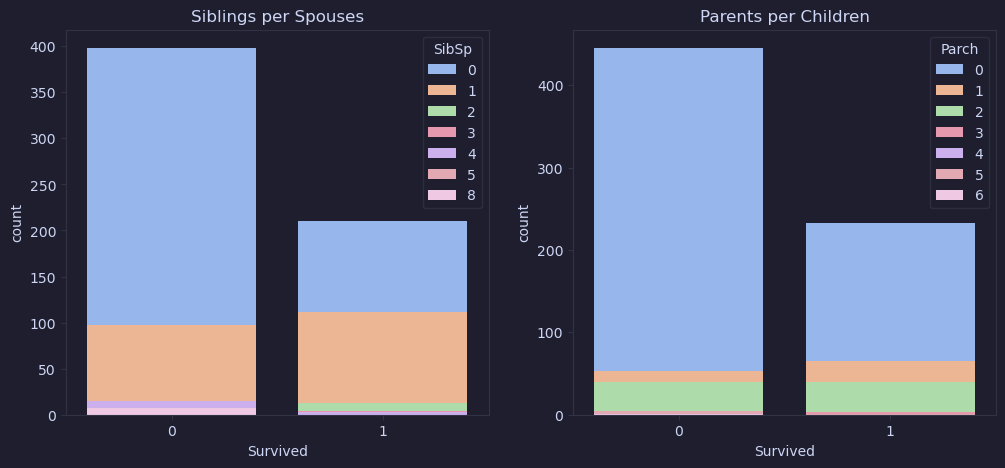

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(data=train_df, x='Survived', hue='SibSp', dodge=False, ax=axs[0])
sns.countplot(data=train_df, x='Survived', hue='Parch', dodge=False, ax=axs[1])
axs[0].set_title('Siblings per Spouses')
axs[1].set_title('Parents per Children')

Text(0.5, 1.0, 'Total Family Size')

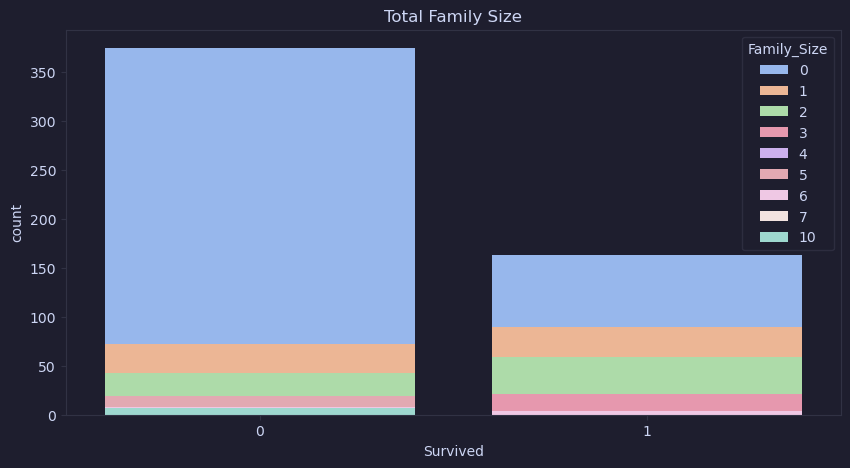

In [13]:
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp']
plt.figure(figsize=(10,5))
sns.countplot(data=train_df, x='Survived', hue='Family_Size', dodge=False)
plt.title('Total Family Size')

In [14]:
family_map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4, 7:4, 8:4, 9:4, 10:4}

train_df['Family_Cat'] = train_df['Family_Size'].map(family_map)
test_df['Family_Cat'] = train_df['Family_Size'].map(family_map)

<AxesSubplot: xlabel='Survived', ylabel='count'>

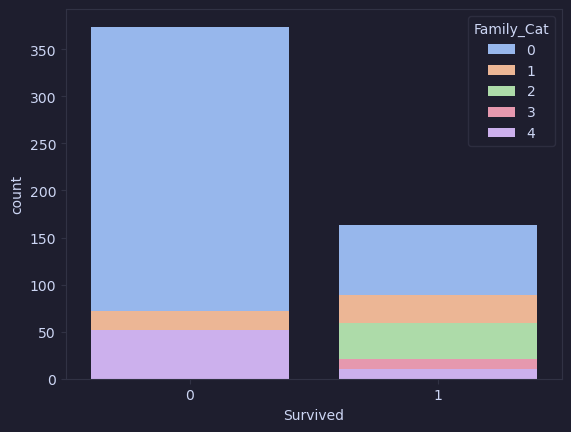

In [15]:
sns.countplot(data=train_df, x='Survived', hue='Family_Cat', dodge=False)

### Age distribution per person's title, this will also help to calculate the ages of the missing people

In [16]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Jonkheer')])

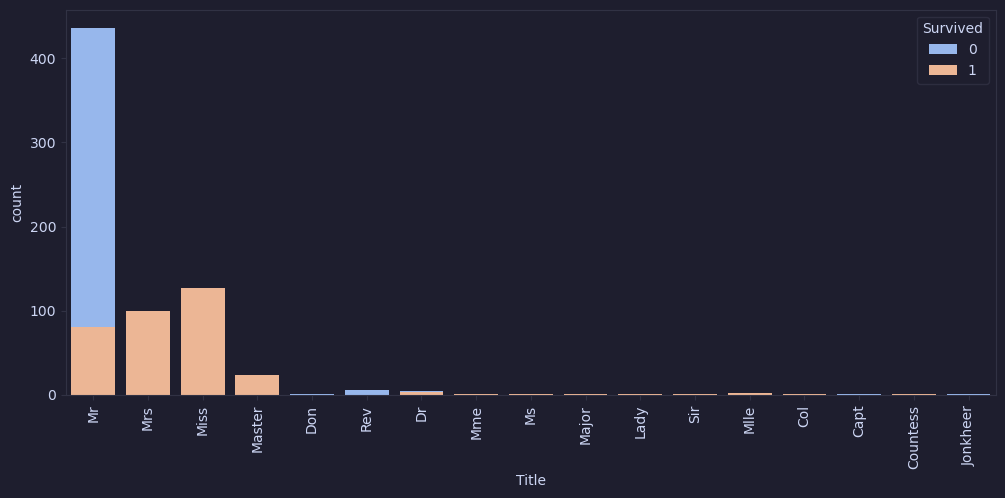

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=train_df, x='Title', hue='Survived', dodge=False)
plt.xticks(rotation=90)

In [18]:
title_map = { ### Map for 'quantifying' the survival probability per title
  'Mr':0,
  'Miss':1,
  'Mrs':2,
  'Master':3,
  'Don':3,
  'Rev':3,
  'Dr':3,
  'Mme':3,
  'Ms':3,
  'Major':3,
  'Lady':3,
  'Sir':3,
  'Mlle':3,
  'Col':3,
  'Capt':3,
  'Countess':3,
  'Jonkheer':3
}

train_df['Title'] = train_df['Title'].map(title_map)
test_df['Title'] = test_df['Title'].map(title_map)

In [19]:
mr = train_df[train_df['Title']==0]['Age']
miss = train_df[train_df['Title']==1]['Age']
mrs = train_df[train_df['Title']==2]['Age']
others = train_df[train_df['Title']==3]['Age']

first_class = train_df[train_df['Pclass']==1]['Age']
second_class = train_df[train_df['Pclass']==2]['Age']
third_class = train_df[train_df['Pclass']==3]['Age']

gender_map = {'male':0, 'female':1}
train_df['Sex'] = train_df['Sex'].map(gender_map)
test_df['Sex'] = test_df['Sex'].map(gender_map)

In [20]:
men = train_df[train_df['Sex']==0]['Age']
women = train_df[train_df['Sex']==1]['Age']

### Check age density per category (class, title and gender)

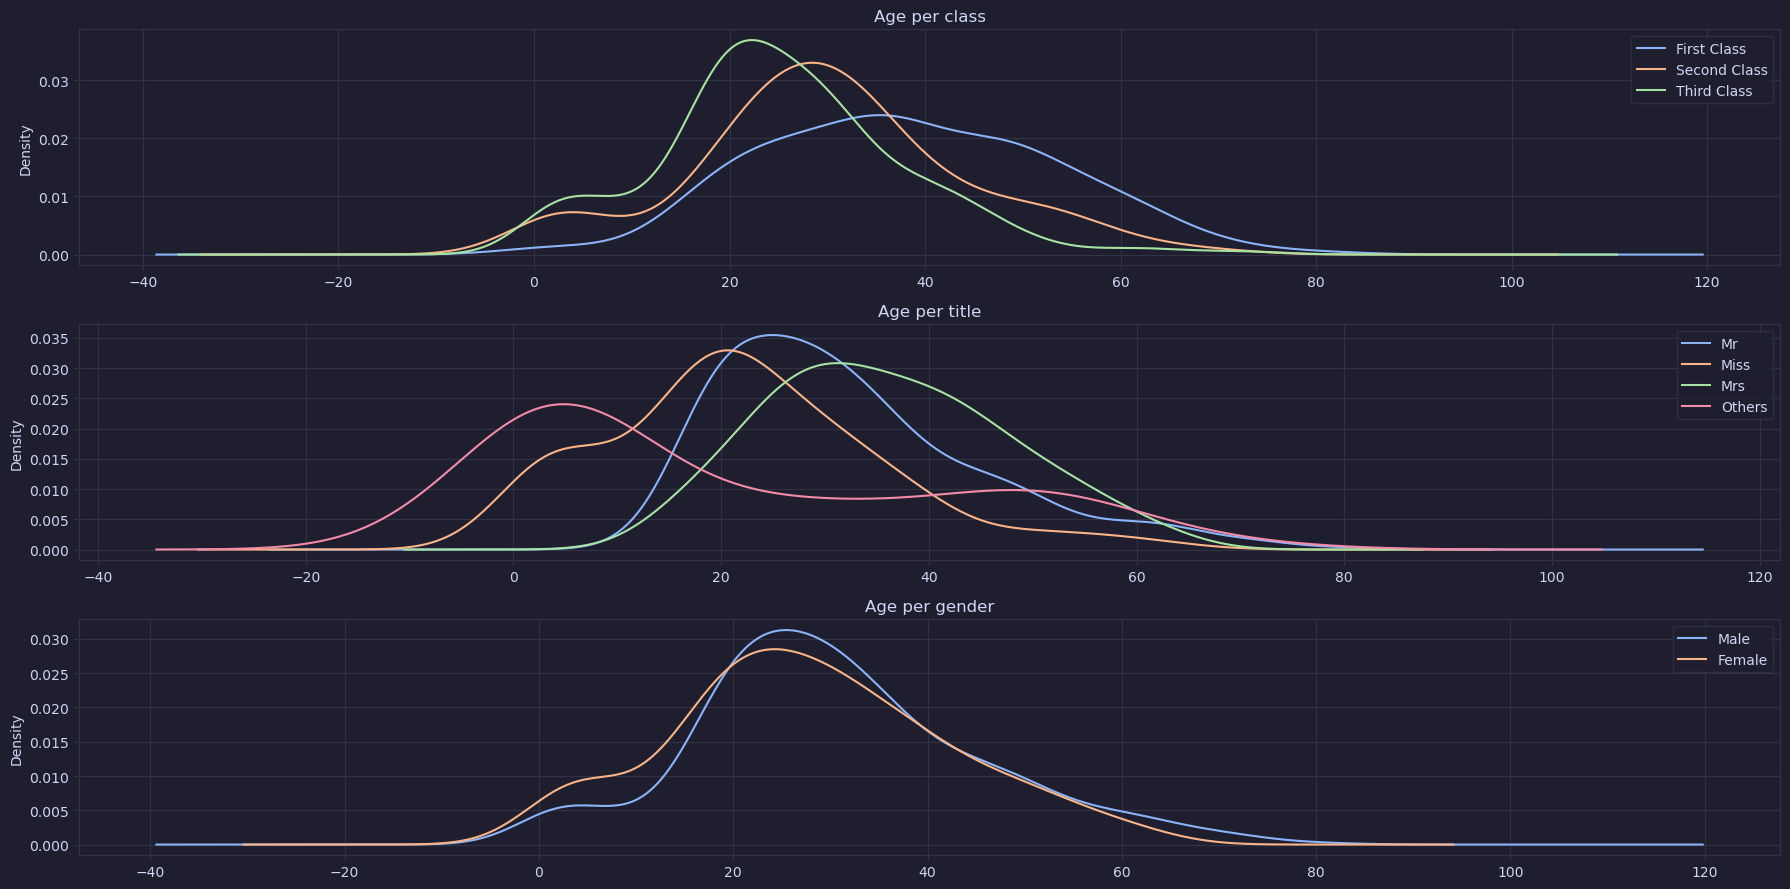

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18,9))
first_class.plot(kind='kde', label='First Class', ax=axs[0])
second_class.plot(kind='kde', label='Second Class', ax=axs[0])
third_class.plot(kind='kde', label='Third Class', ax=axs[0])
axs[0].legend()
axs[0].grid()
axs[0].set_title('Age per class')
mr.plot(kind='kde', label='Mr', ax=axs[1])
miss.plot(kind='kde', label='Miss', ax=axs[1])
mrs.plot(kind='kde', label='Mrs', ax=axs[1])
others.plot(kind='kde', label='Others', ax=axs[1])
axs[1].legend()
axs[1].grid()
axs[1].set_title('Age per title')
men.plot(kind='kde', label='Male', ax=axs[2])
women.plot(kind='kde', label='Female', ax=axs[2])
axs[2].legend()
axs[2].grid()
axs[2].set_title('Age per gender')
plt.tight_layout()
plt.show()

### Based on the densities, below the calculation for filling the missing ages

In [22]:
train_df['Class_title'] = 100*train_df['Sex']+10*train_df['Pclass']+train_df['Title']
test_df['Class_title'] = 100*test_df['Sex']+10*test_df['Pclass']+test_df['Title']

train_df['Age'].fillna(train_df.groupby('Class_title')['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(test_df.groupby('Class_title')['Age'].transform('median'), inplace=True)

In [23]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
Family_Cat       0
Title            0
Class_title      0
dtype: int64

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/373468793.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x='Age', bins=20, hue='Survived', kde=True, ax=axs[0], palette=pal)
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/373468793.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.histplot(data=train_df, x='Age', hue='Pclass', bins=20, kde=True, ax=axs[1], palette=pal)
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/373468793.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x='Age', bins=20, hue='Sex',kde=True, ax=axs[2], palette=pal)


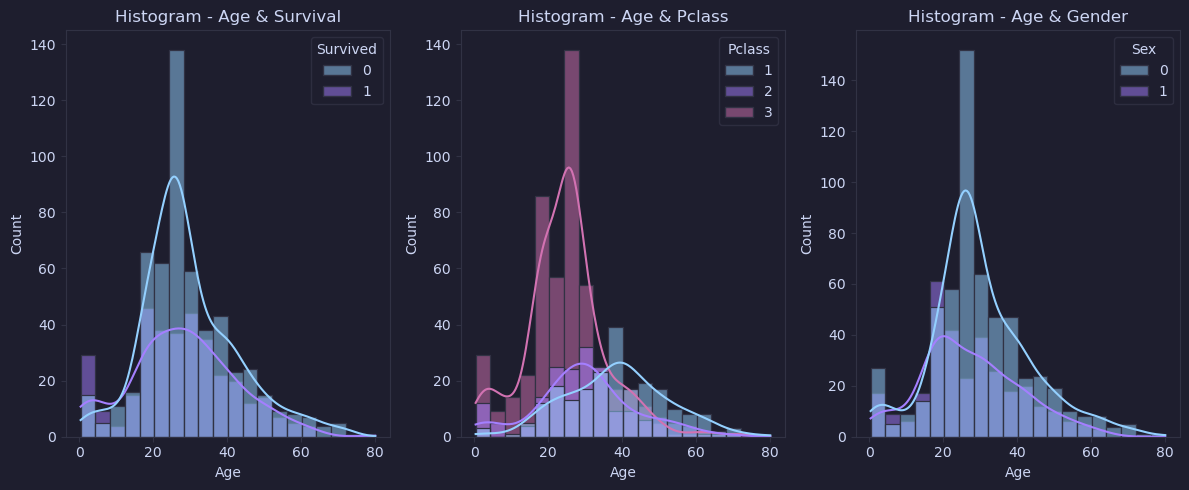

In [24]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5))
pal = sns.blend_palette(vapeplot.palette('vaporwave'))
sns.histplot(data=train_df, x='Age', bins=20, hue='Survived', kde=True, ax=axs[0], palette=pal)
sns.histplot(data=train_df, x='Age', hue='Pclass', bins=20, kde=True, ax=axs[1], palette=pal)
sns.histplot(data=train_df, x='Age', bins=20, hue='Sex',kde=True, ax=axs[2], palette=pal)
axs[0].set_title('Histogram - Age & Survival')
axs[1].set_title('Histogram - Age & Pclass')
axs[2].set_title('Histogram - Age & Gender')
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

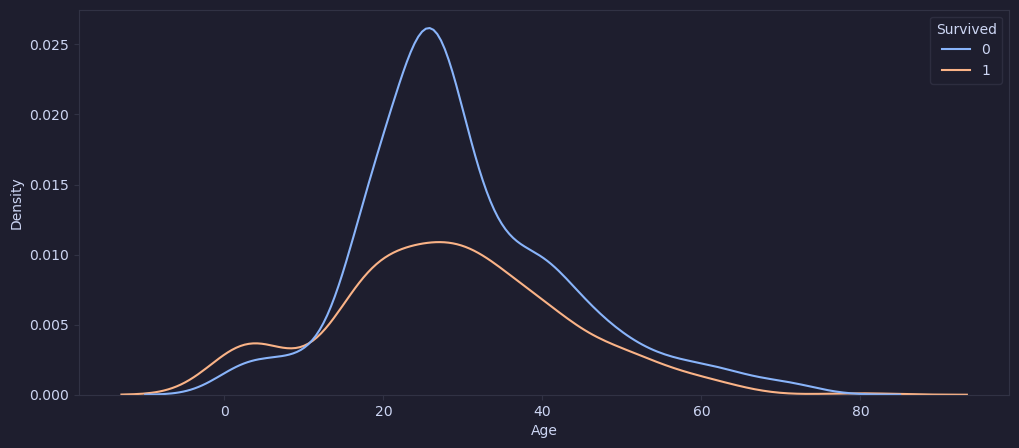

In [25]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=train_df, x='Age', hue='Survived')

### Make bins based on age ranges depending on their survival ratio

In [26]:
train_df.loc[train_df['Age'].between(0, 21, 'both'), 'Age_Bin'] = 0
train_df.loc[train_df['Age'].between(21, 25, 'right'), 'Age_Bin'] = 1
train_df.loc[train_df['Age'].between(25, 100, 'right'), 'Age_Bin'] = 2

test_df.loc[test_df['Age'].between(0, 21, 'both'), 'Age_Bin'] = 0
test_df.loc[test_df['Age'].between(21, 25, 'right'), 'Age_Bin'] = 1
test_df.loc[test_df['Age'].between(25, 100, 'right'), 'Age_Bin'] = 2

### Since there are few missing points in 'Embarked', we can fill the missing data with the most common point

In [27]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

<AxesSubplot: xlabel='Survived', ylabel='count'>

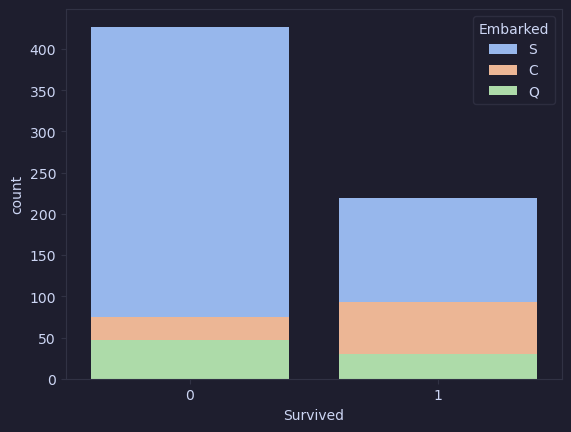

In [28]:
sns.countplot(data=train_df, x='Survived', hue='Embarked', dodge=False)

In [29]:
map_embarked = {'S':0, 'C':1, 'Q':2}

train_df['Embarked'] = train_df['Embarked'].map(map_embarked)
test_df['Embarked'] = test_df['Embarked'].map(map_embarked)

### The first letter of the cabin indicate the location within the ship, also known as deck

In [30]:
train_df['Cabin'] = train_df['Cabin'].str[:1]
test_df['Cabin'] = test_df['Cabin'].str[:1]

<AxesSubplot: >

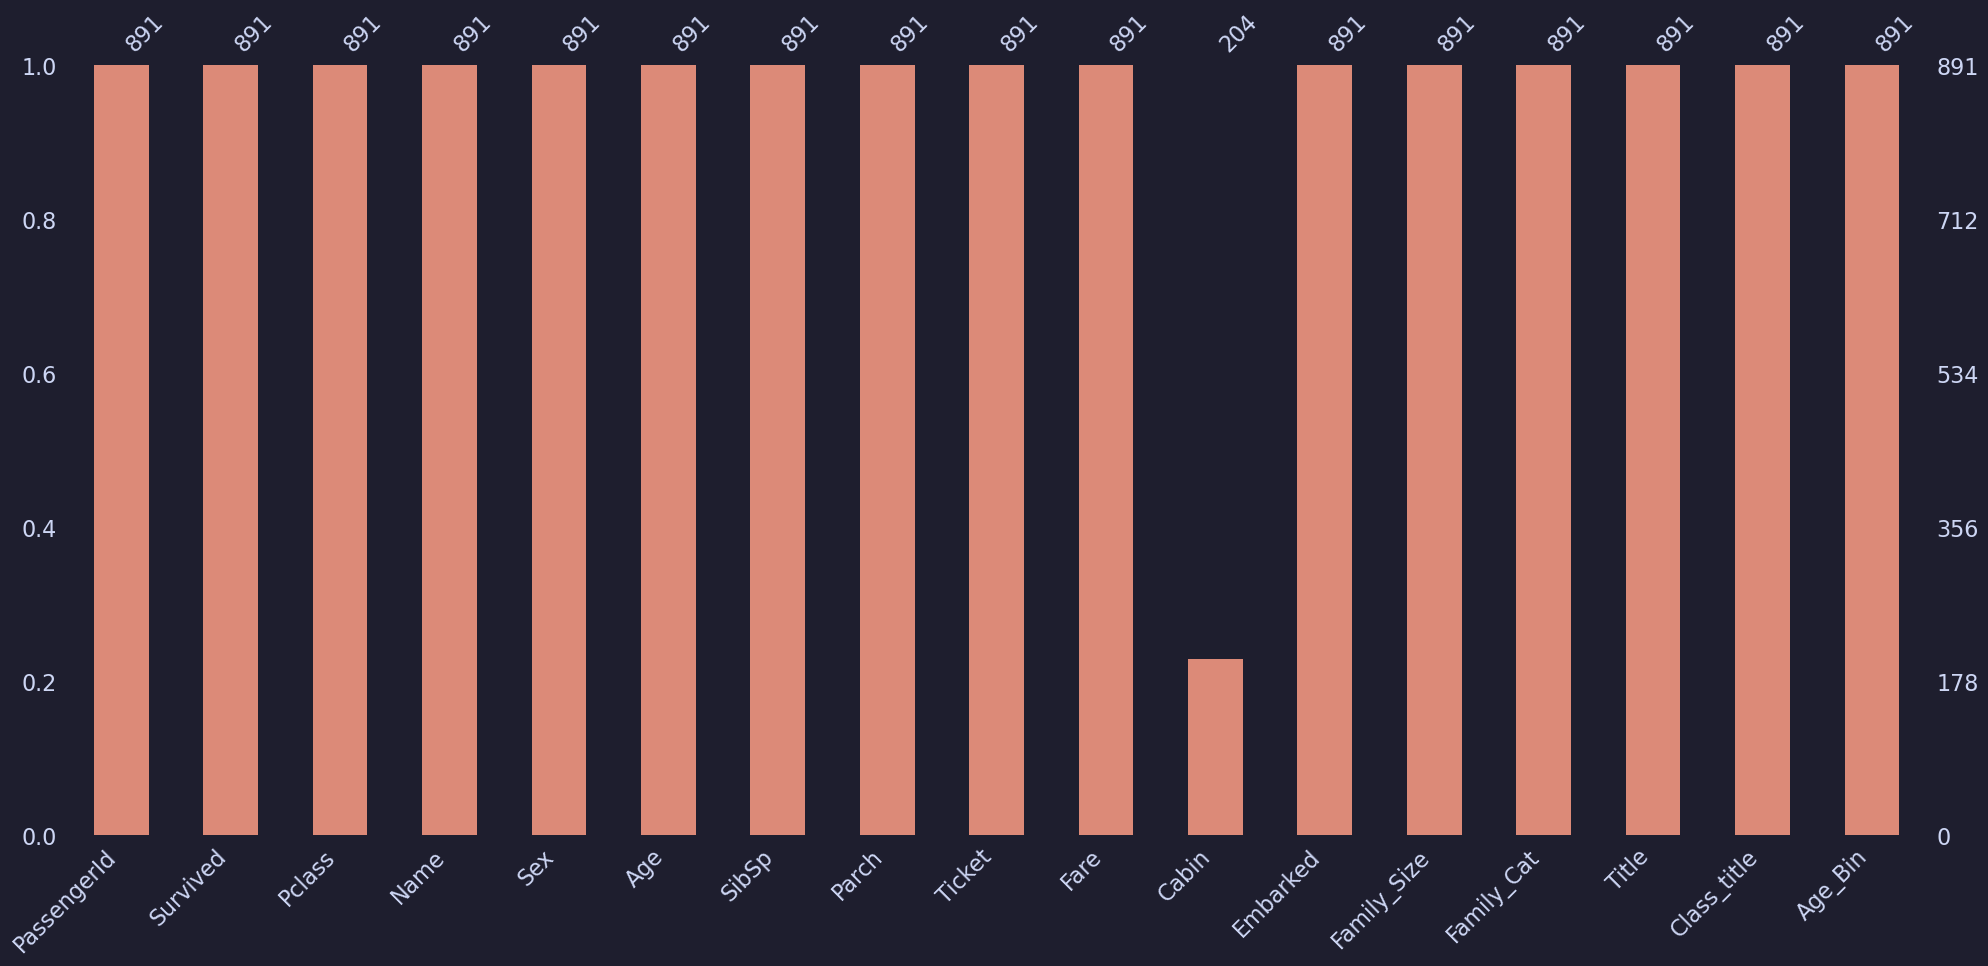

In [31]:
msno.bar(train_df, color='#DC8A78')

<AxesSubplot: >

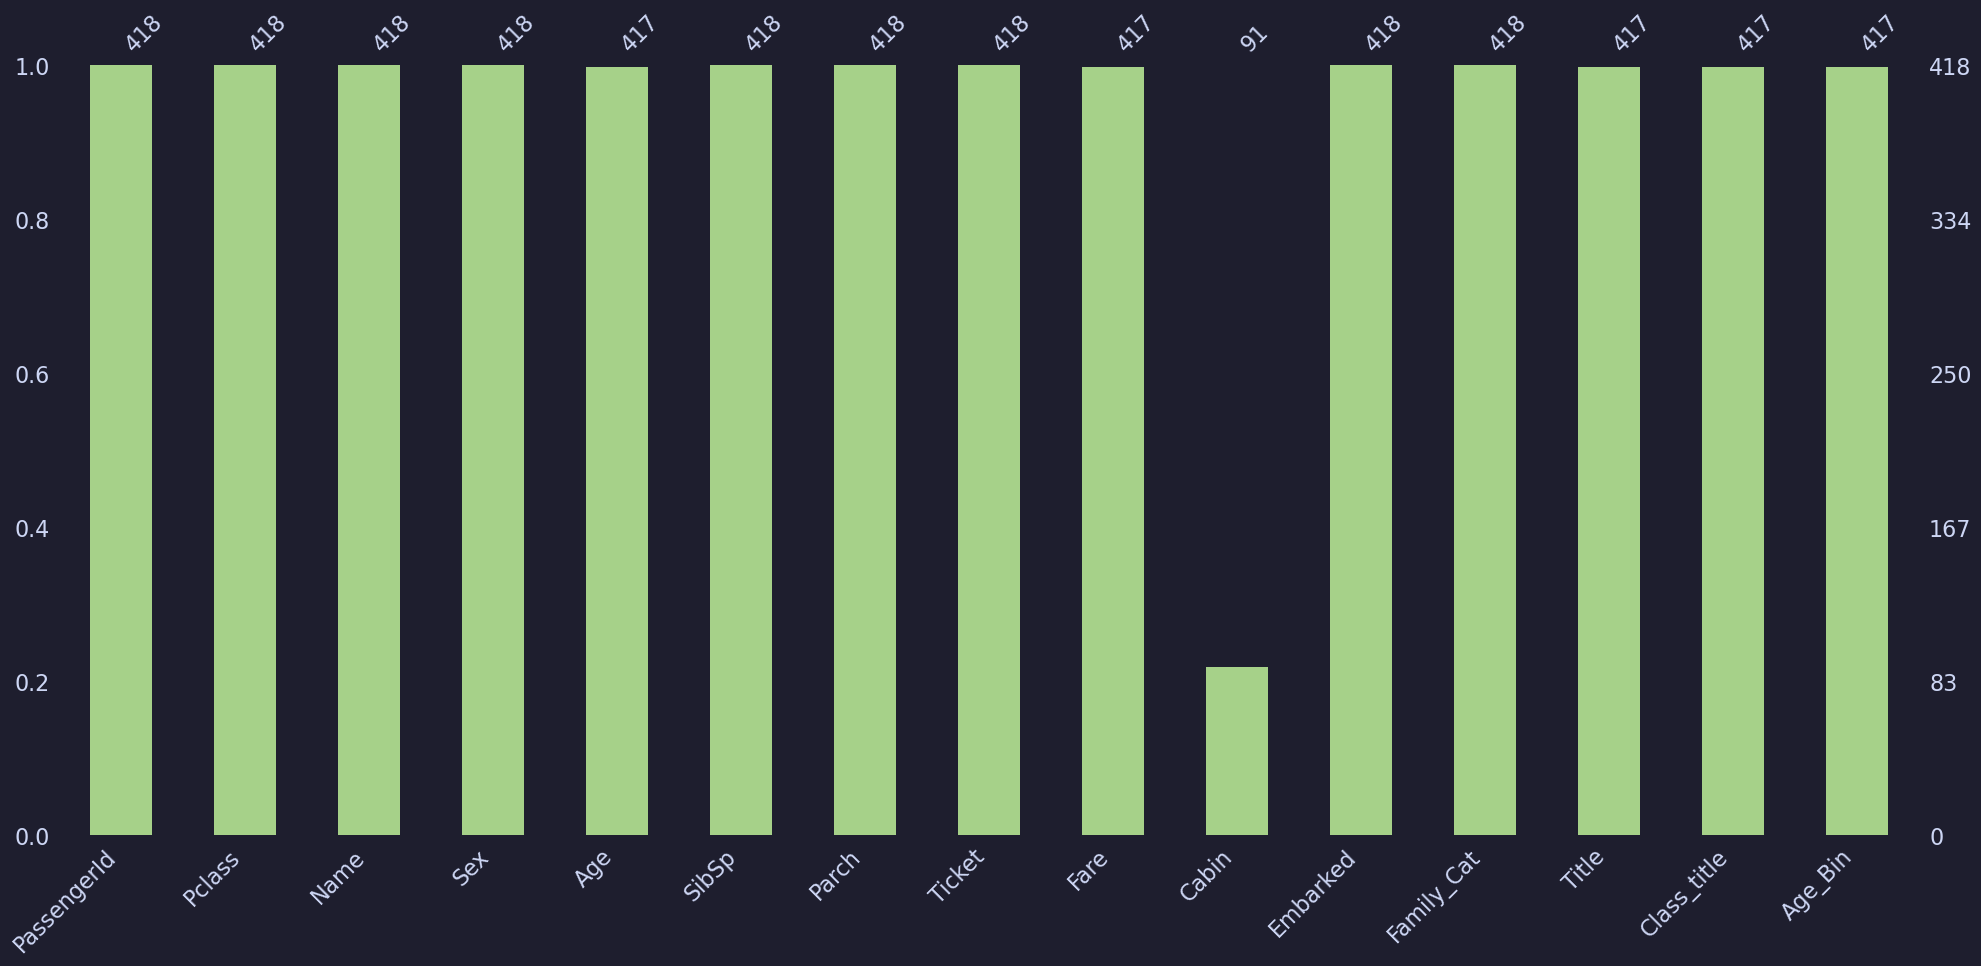

In [32]:
msno.bar(test_df, color='#A6D189')

#### Since there are still several rows to be filled, these wil be replaced with 'M' which stands for 'Missing'

In [33]:
test_df['Cabin'] = test_df['Cabin'].fillna('M')
train_df['Cabin'] = train_df['Cabin'].fillna('M')

<AxesSubplot: >

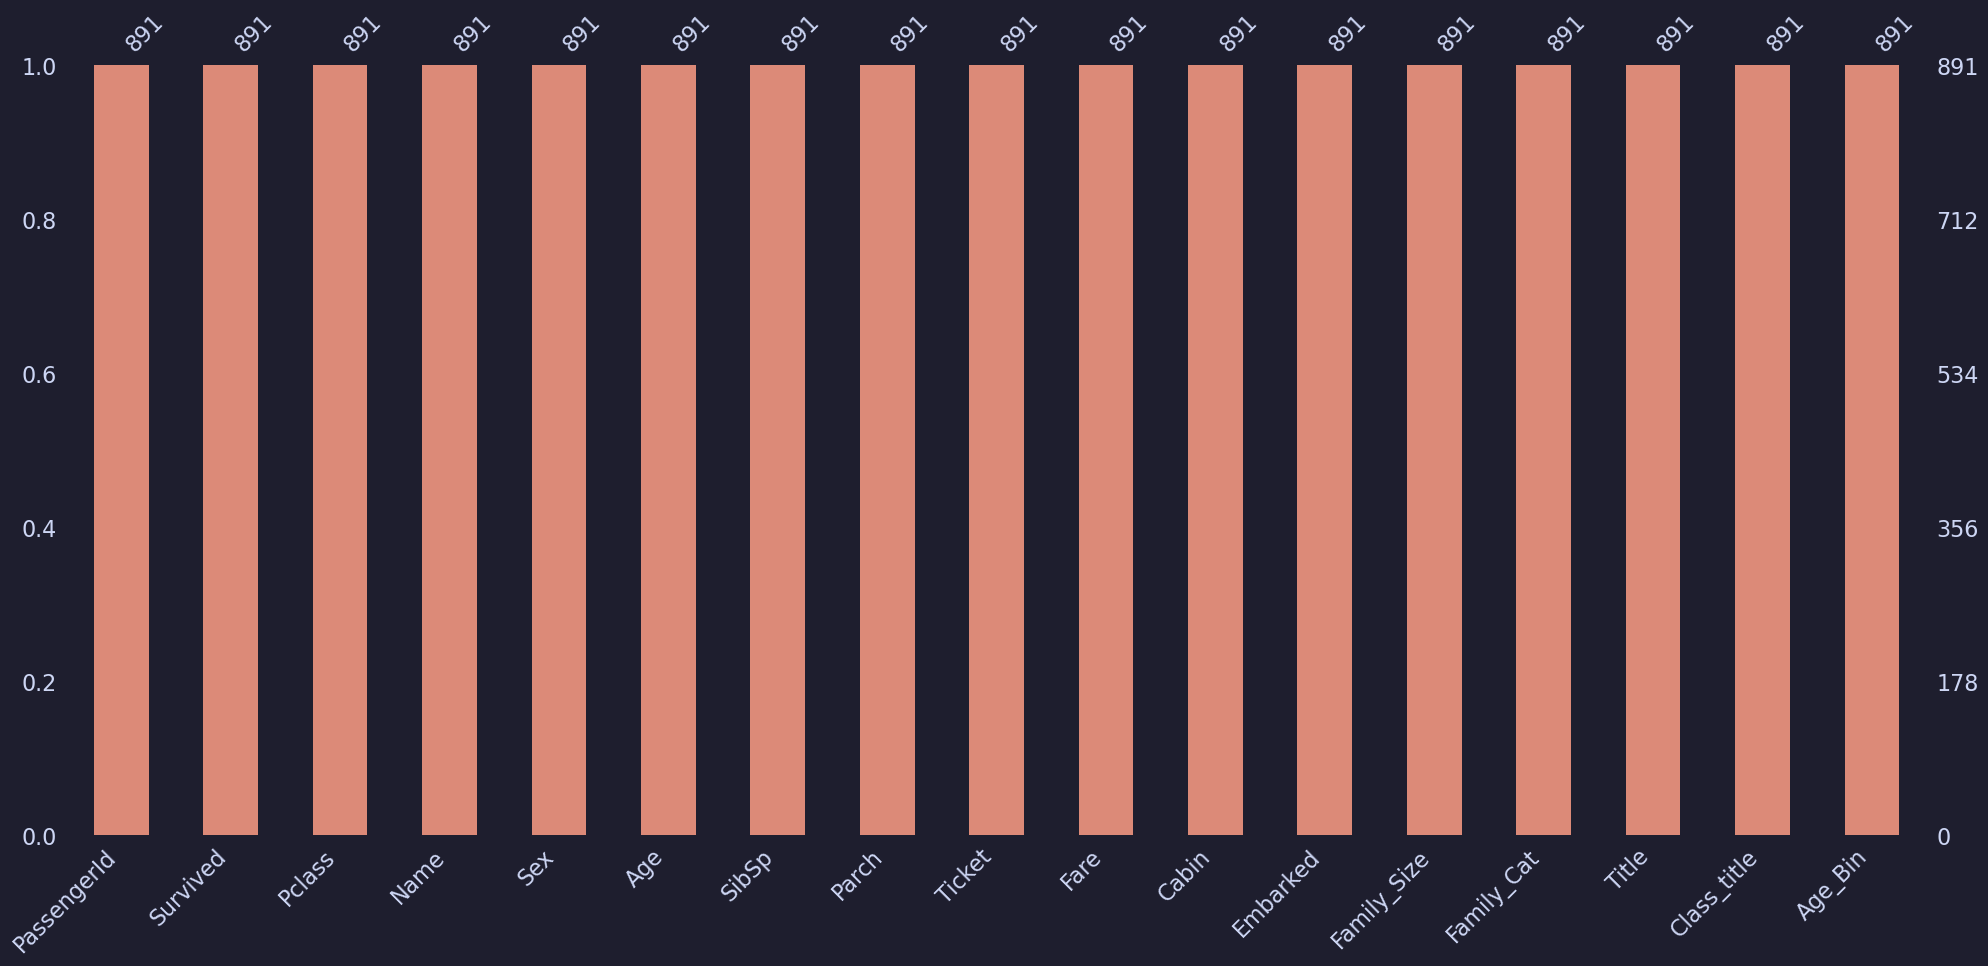

In [34]:
msno.bar(train_df, color='#DC8A78')

<AxesSubplot: xlabel='Cabin', ylabel='count'>

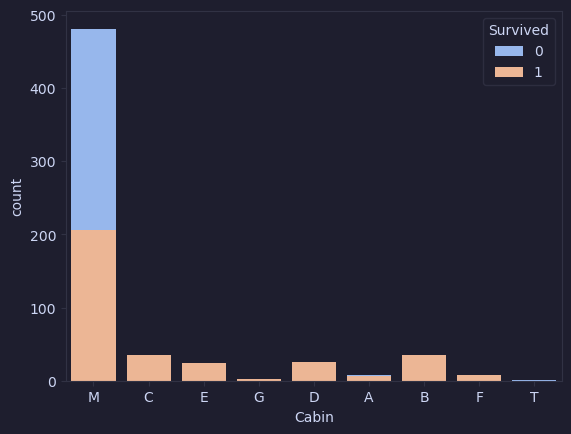

In [35]:
sns.countplot(data=train_df, x='Cabin', hue='Survived', dodge=False)

<AxesSubplot: title={'center': 'Percentage cabin assignment per class'}>

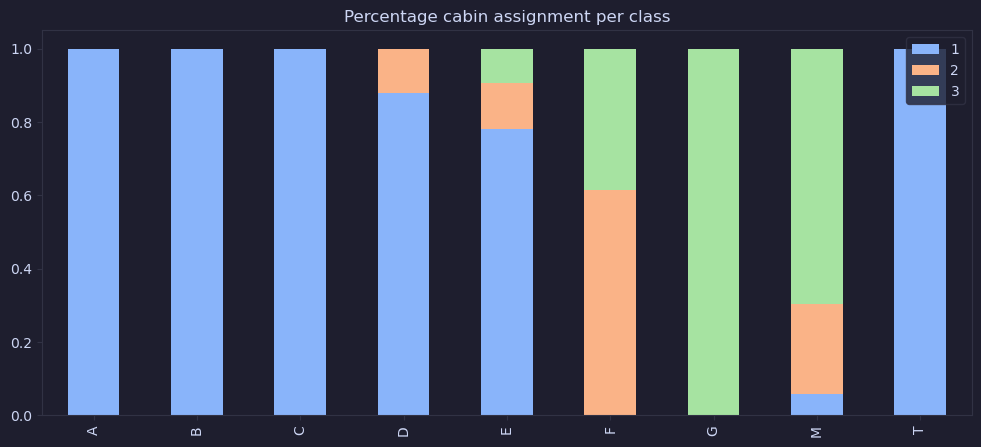

In [36]:
A = train_df[train_df['Cabin']=='A']['Pclass'].value_counts()
B = train_df[train_df['Cabin']=='B']['Pclass'].value_counts()
C = train_df[train_df['Cabin']=='C']['Pclass'].value_counts()
D = train_df[train_df['Cabin']=='D']['Pclass'].value_counts()
E = train_df[train_df['Cabin']=='E']['Pclass'].value_counts()
F = train_df[train_df['Cabin']=='F']['Pclass'].value_counts()
G = train_df[train_df['Cabin']=='G']['Pclass'].value_counts()
M = train_df[train_df['Cabin']=='M']['Pclass'].value_counts()
T = train_df[train_df['Cabin']=='T']['Pclass'].value_counts()

A = A/sum(A)
B = B/sum(B)
C = C/sum(C)
D = D/sum(D)
E = E/sum(E)
F = F/sum(F)
G = G/sum(G)
M = M/sum(M)
T = T/sum(T)

df_cabin = pd.DataFrame(
  data=[A,B,C,D,E,F,G,M,T],
  index=['A','B','C','D','E','F','G','M','T'])

df_cabin.plot(kind='bar', stacked=True, figsize=(12,5), title='Percentage cabin assignment per class')

### Let's take a look at the cabin distribution in the Titanic

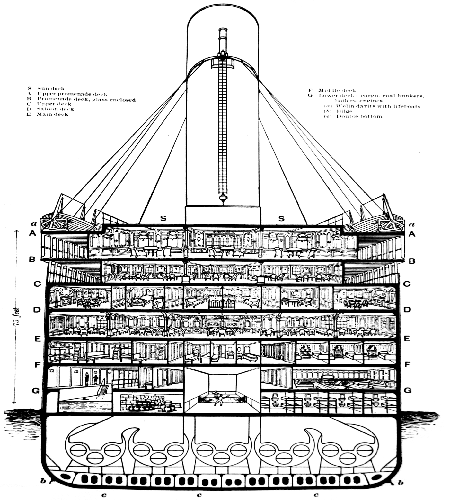

In [37]:
from PIL import Image

layout = Image.open('./titanic_deck.png')
layout.resize((450,500))

#### As shown in the ship's layout, there is not a 'T' cabin listed, therefore the 'T' deck is most likely referred to either decks A, B or C given the predominant class in it is First class

<AxesSubplot: title={'center': 'Percentage survival per cabin'}>

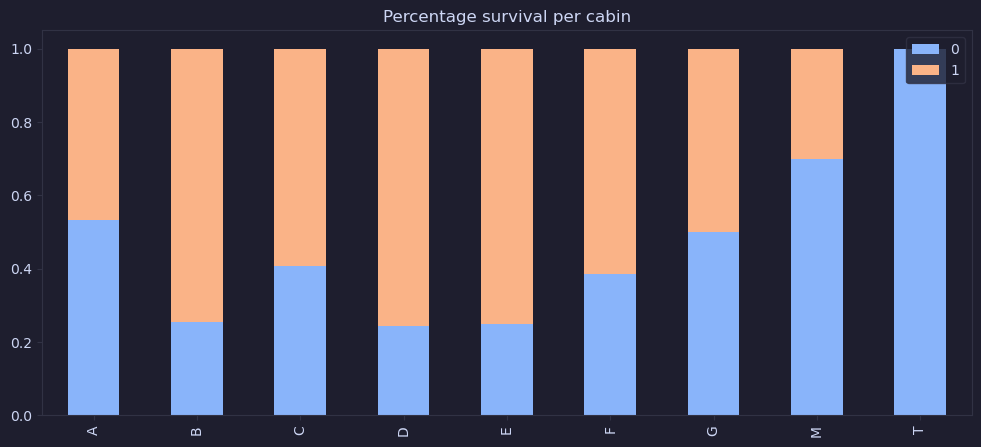

In [38]:
A = train_df[train_df['Cabin']=='A']['Survived'].value_counts()
B = train_df[train_df['Cabin']=='B']['Survived'].value_counts()
C = train_df[train_df['Cabin']=='C']['Survived'].value_counts()
D = train_df[train_df['Cabin']=='D']['Survived'].value_counts()
E = train_df[train_df['Cabin']=='E']['Survived'].value_counts()
F = train_df[train_df['Cabin']=='F']['Survived'].value_counts()
G = train_df[train_df['Cabin']=='G']['Survived'].value_counts()
M = train_df[train_df['Cabin']=='M']['Survived'].value_counts()
T = train_df[train_df['Cabin']=='T']['Survived'].value_counts()

A = A/sum(A)
B = B/sum(B)
C = C/sum(C)
D = D/sum(D)
E = E/sum(E)
F = F/sum(F)
G = G/sum(G)
M = M/sum(M)
T = T/sum(T)

df_cabin_survived = pd.DataFrame(
  data=[A,B,C,D,E,F,G,M,T],
  index=['A','B','C','D','E','F','G','M','T'])

df_cabin_survived.plot(kind='bar', stacked=True, figsize=(12,5), title='Percentage survival per cabin')

In [39]:
cabin_map = {
  'A':0,
  'B':0,
  'C':0,
  'D':1,
  'E':1,
  'F':2,
  'G':2,
  'T':2,
  'M':3
}

train_df['Cabin'] = train_df['Cabin'].map(cabin_map)
test_df['Cabin'] = test_df['Cabin'].map(cabin_map)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

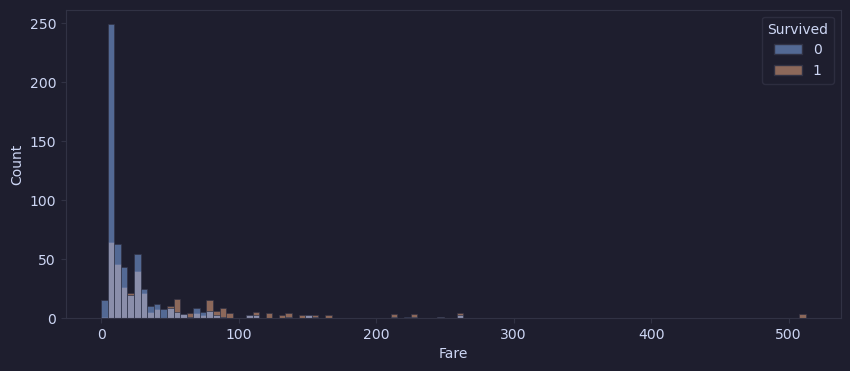

In [40]:
plt.figure(figsize=(10,4))
sns.histplot(data=train_df, x='Fare', hue='Survived')

<AxesSubplot: xlabel='Fare', ylabel='Density'>

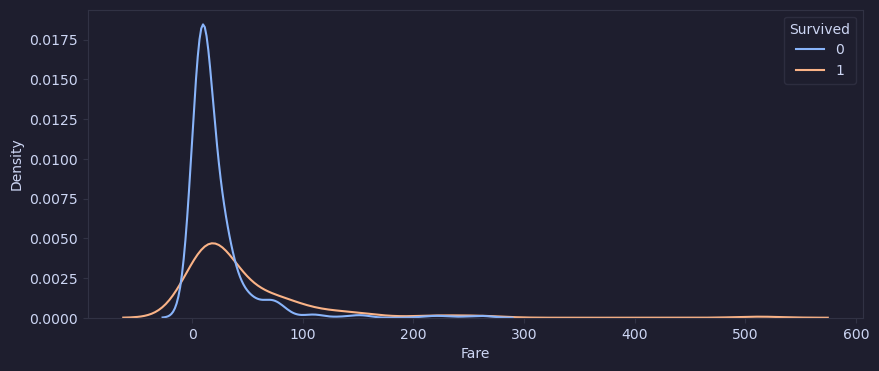

In [41]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=train_df, x='Fare', hue='Survived')


In [42]:
train_df['Fare'].loc[train_df['Fare']<27] = 0
train_df['Fare'].loc[train_df['Fare']>=27] = 1

test_df['Fare'].loc[test_df['Fare']<27] = 0
test_df['Fare'].loc[test_df['Fare']>=27] = 1

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/3462843959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fare'].loc[train_df['Fare']<27] = 0
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/3462843959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Fare'].loc[train_df['Fare']>=27] = 1
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/3462843959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<AxesSubplot: xlabel='Fare', ylabel='count'>

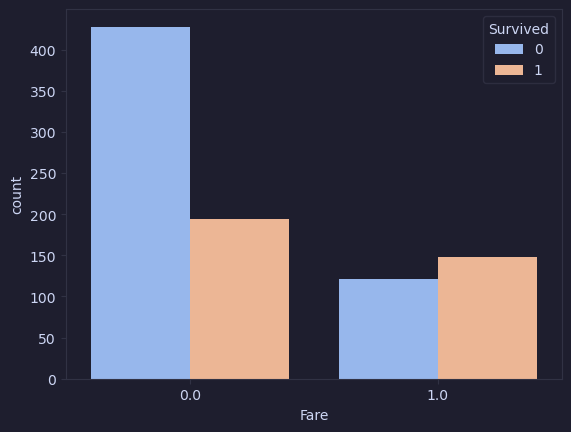

In [43]:
sns.countplot(data=train_df, x='Fare', hue='Survived')

In [44]:
train_df['Ticket_freq'] = train_df.groupby('Ticket')['Ticket'].transform('count')
test_df['Ticket_freq'] = test_df.groupby('Ticket')['Ticket'].transform('count')

<AxesSubplot: xlabel='Ticket_freq', ylabel='count'>

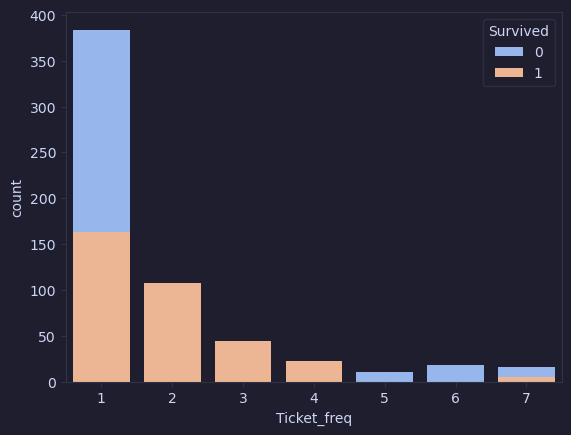

In [45]:
sns.countplot(data=train_df, x='Ticket_freq', hue='Survived', dodge=False)

In [46]:
ticket_map = {1:0, 2:1, 3:2, 4:3, 5:4, 6:4, 7:4}

train_df['Ticket_freq'] = train_df['Ticket_freq'].map(ticket_map)
test_df['Ticket_freq'] = test_df['Ticket_freq'].map(ticket_map)

In [47]:
train_df['Surname'] = train_df['Name'].str.extract('([A-Za-z]+)\,', expand=False)
test_df['Surname'] = test_df['Name'].str.extract('([A-Za-z]+)\,', expand=False)

In [48]:
fam_surv_rate = train_df.groupby('Surname')['Survived', 'Surname', 'Family_Size'].median()

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/1843752674.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fam_surv_rate = train_df.groupby('Surname')['Survived', 'Surname', 'Family_Size'].median()
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/1843752674.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fam_surv_rate = train_df.groupby('Surname')['Survived', 'Surname', 'Family_Size'].median()


In [49]:
non_unique_fams = [x for x in train_df['Surname'].unique() if x in test_df['Surname'].unique()]
fam_rates = {}
for i in range(len(fam_surv_rate)):
  if fam_surv_rate.index[i] in non_unique_fams and fam_surv_rate.iloc[i,1] > 1:
    fam_rates[fam_surv_rate.index[i]] = fam_surv_rate.iloc[i,0]

In [50]:
fam_surv_rate_train = []
mean_surv_rate = np.mean(train_df['Survived'])

for i in range(len(train_df)):
  if train_df['Surname'][i] in fam_rates:
    fam_surv_rate_train.append(fam_rates[train_df['Surname'][i]])
  else:
    fam_surv_rate_train.append(mean_surv_rate)

fam_surv_rate_test = []
for i in range(len(test_df)):
  if test_df['Surname'][i] in fam_rates:
    fam_surv_rate_test.append(fam_rates[test_df['Surname'][i]])
  else:
    fam_surv_rate_test.append(mean_surv_rate)

In [51]:
train_df['Fam_surv_rate'] = fam_surv_rate_train
test_df['Fam_surv_rate'] = fam_surv_rate_test

In [52]:
tkt_surv_rate = train_df.groupby('Ticket')['Survived', 'Ticket', 'Ticket_freq'].median()

non_uniq_tkts = [x for x in train_df['Ticket'].unique() if x in test_df['Ticket'].unique()]

tkt_rates = {}
for i in range(len(tkt_surv_rate)):
  if tkt_surv_rate.index[i] in non_uniq_tkts and tkt_surv_rate.iloc[i,1] > 1:
    tkt_rates[tkt_surv_rate.index[i]] = tkt_surv_rate.iloc[i,0]

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/584397129.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tkt_surv_rate = train_df.groupby('Ticket')['Survived', 'Ticket', 'Ticket_freq'].median()
/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/584397129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tkt_surv_rate = train_df.groupby('Ticket')['Survived', 'Ticket', 'Ticket_freq'].median()


In [53]:
tkt_surv_rate_train = []
mean_tkt_rate = np.mean(train_df['Survived'])

for i in range(len(train_df)):
  if train_df['Ticket'][i] in tkt_rates:
    tkt_surv_rate_train.append(tkt_rates[train_df['Ticket'][i]])
  else:
    tkt_surv_rate_train.append(mean_tkt_rate)

tkt_surv_rate_test = []
for i in range(len(test_df)):
  if test_df['Ticket'][i] in tkt_rates:
    tkt_surv_rate_test.append(tkt_rates[test_df['Ticket'][i]])
  else:
    tkt_surv_rate_test.append(mean_tkt_rate)

In [54]:
train_df['Tkt_surv_rate'] = tkt_surv_rate_train
test_df['Tkt_surv_rate'] = tkt_surv_rate_test

In [55]:
train_df['Surv_rate'] = train_df['Tkt_surv_rate'] + train_df['Fam_surv_rate']
test_df['Surv_rate'] = test_df['Tkt_surv_rate'] + test_df['Fam_surv_rate']

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Cat,Title,Class_title,Age_Bin,Ticket_freq,Surname,Fam_surv_rate,Tkt_surv_rate,Surv_rate
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0.0,3,0,1,1,0,30,1.0,0,Braund,0.383838,0.383838,0.767677
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1.0,0,1,1,1,2,112,2.0,0,Cumings,0.383838,0.383838,0.767677
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0.0,3,0,0,0,1,131,2.0,0,Heikkinen,0.383838,0.383838,0.767677
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,1.0,0,0,1,1,2,112,2.0,1,Futrelle,0.383838,0.383838,0.767677
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0.0,3,0,0,0,0,30,2.0,0,Allen,0.383838,0.383838,0.767677


/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/472661806.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df_corr = train_df.corr()


<AxesSubplot: >

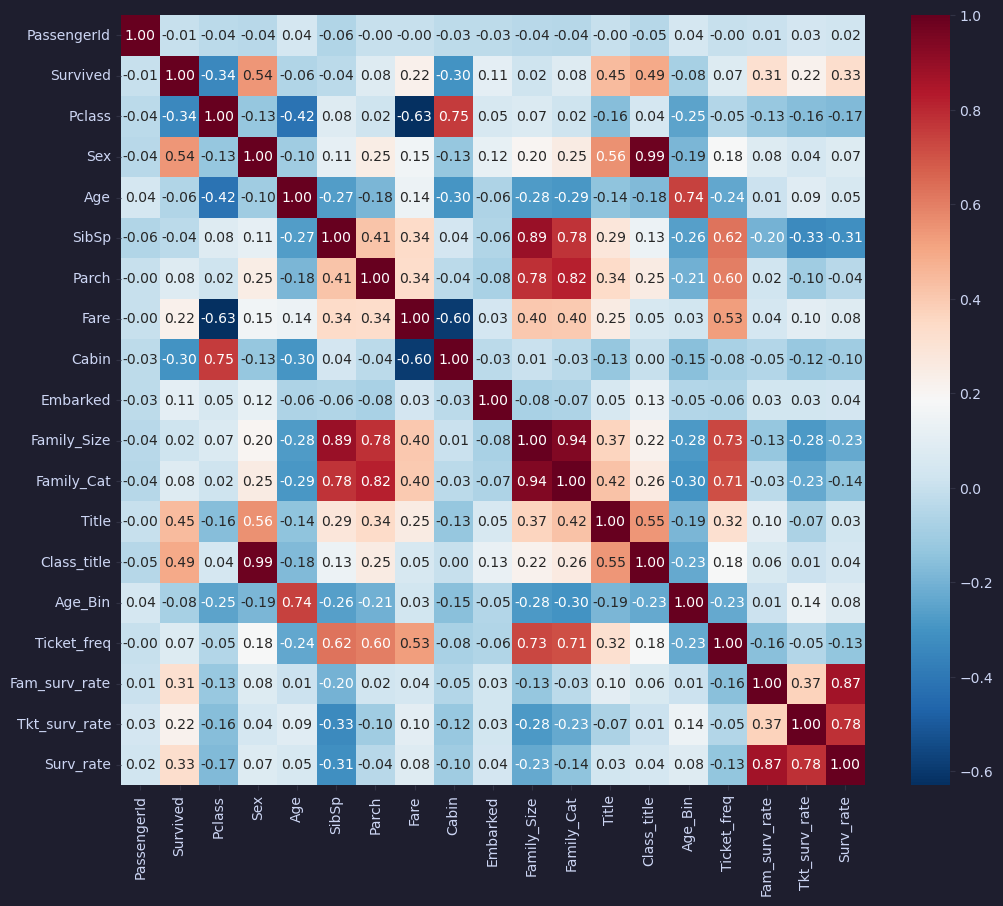

In [56]:
train_df_corr = train_df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(train_df_corr, annot=True, cmap='RdBu_r', fmt='0.2f')

In [57]:
train_df_corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_Size,Family_Cat,Title,Class_title,Age_Bin,Ticket_freq,Fam_surv_rate,Tkt_surv_rate,Surv_rate
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.042110,-0.057527,-0.001652,-0.000798,-0.027734,-0.030467,-0.040143,-0.044630,-0.002555,-0.048983,0.044663,-0.004334,0.006316,0.034689,0.022666
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.061201,-0.035322,0.081629,0.224945,-0.300301,0.106811,0.016639,0.079795,0.445792,0.491632,-0.084252,0.072036,0.313889,0.217637,0.326672
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.416085,0.083081,0.018443,-0.629097,0.752051,0.045702,0.065997,0.016806,-0.164205,0.039561,-0.250889,-0.052027,-0.126114,-0.163917,-0.171854
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.101425,0.114631,0.245489,0.154552,-0.128217,0.116569,0.200988,0.250322,0.557890,0.985131,-0.185661,0.182942,0.076024,0.039973,0.072357
Age,0.042110,-0.061201,-0.416085,-0.101425,1.000000,-0.270332,-0.184632,0.137088,-0.295828,-0.063658,-0.277001,-0.288722,-0.140921,-0.176504,0.741058,-0.237532,0.009135,0.085827,0.051713
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.270332,1.000000,0.414838,0.342290,0.036413,-0.059961,0.890712,0.777181,0.287060,0.134557,-0.263959,0.624749,-0.200153,-0.334386,-0.312160
Parch,-0.001652,0.081629,0.018443,0.245489,-0.184632,0.414838,1.000000,0.337911,-0.035538,-0.078665,0.783111,0.817208,0.341660,0.254836,-0.207152,0.601416,0.020398,-0.103246,-0.041097
Fare,-0.000798,0.224945,-0.629097,0.154552,0.137088,0.342290,0.337911,1.000000,-0.596166,0.033807,0.402758,0.398291,0.249695,0.049419,0.031829,0.528040,0.043180,0.098275,0.081220
Cabin,-0.027734,-0.300301,0.752051,-0.128217,-0.295828,0.036413,-0.035538,-0.596166,1.000000,-0.032711,0.007133,-0.032119,-0.130887,0.000672,-0.151910,-0.079653,-0.054497,-0.123684,-0.102323
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.063658,-0.059961,-0.078665,0.033807,-0.032711,1.000000,-0.080281,-0.066494,0.049699,0.125176,-0.054496,-0.060470,0.032716,0.028051,0.036898


In [58]:
train = train_df[['Survived', 'Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked', 'Family_Cat', 'Class_title', 'Age_Bin', 'Ticket_freq', 'Surv_rate']]

In [59]:
X = train.drop('Survived', axis=1)
y = train['Survived']

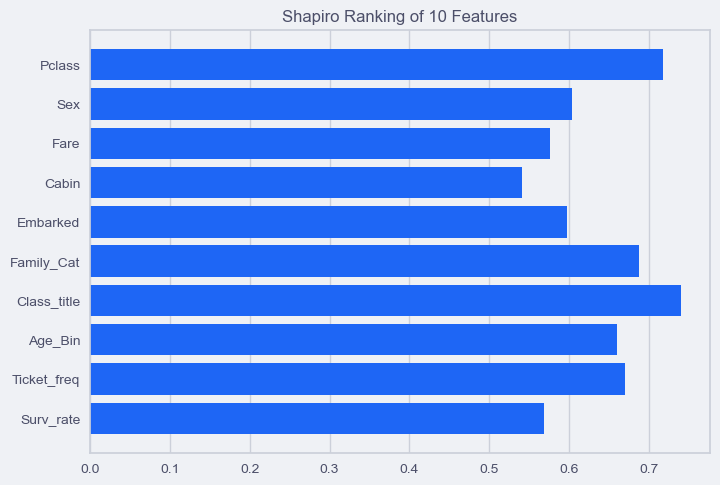

<AxesSubplot: title={'center': 'Shapiro Ranking of 10 Features'}>

In [60]:
from yellowbrick.features import Rank1D, Rank2D

mpl.style.use('latte')
vis_1d = Rank1D()
vis_1d.fit(X, y)
vis_1d.transform(X)
vis_1d.show()

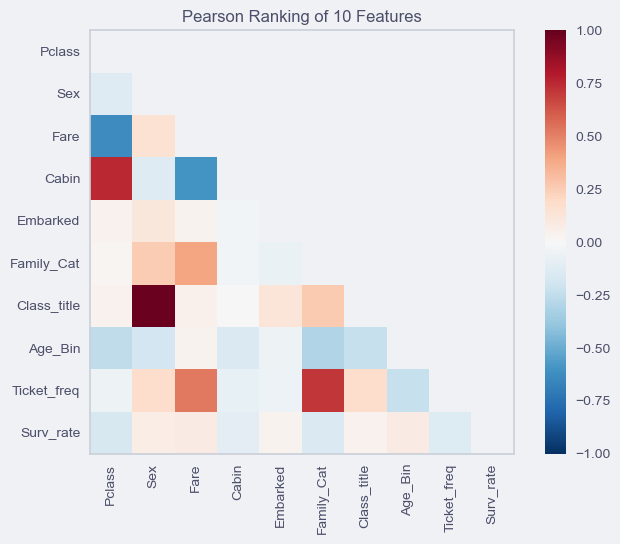

<AxesSubplot: title={'center': 'Pearson Ranking of 10 Features'}>

In [61]:
vis_2d = Rank2D(algorithm='pearson')

vis_2d.fit(X, y)
vis_2d.transform(X)
vis_2d.show()

In [62]:
from sklearn.neural_network import MLPClassifier

neuron = MLPClassifier(
  hidden_layer_sizes=10,
  activation='relu',
  solver='adam',
  learning_rate='adaptive',
  learning_rate_init=0.0001,
  max_iter = 10000,
  verbose=True,

)

neuron.fit(X, y)

Iteration 1, loss = 9.18100913
Iteration 2, loss = 9.13436722
Iteration 3, loss = 9.08813707
Iteration 4, loss = 9.04152153
Iteration 5, loss = 8.99717406
Iteration 6, loss = 8.95095781
Iteration 7, loss = 8.90516915
Iteration 8, loss = 8.85989895
Iteration 9, loss = 8.81416028
Iteration 10, loss = 8.76962360
Iteration 11, loss = 8.72426014
Iteration 12, loss = 8.67910769
Iteration 13, loss = 8.63485292
Iteration 14, loss = 8.58999183
Iteration 15, loss = 8.54620198
Iteration 16, loss = 8.50218169
Iteration 17, loss = 8.45730569
Iteration 18, loss = 8.41422007
Iteration 19, loss = 8.37019492
Iteration 20, loss = 8.32702782
Iteration 21, loss = 8.28408972
Iteration 22, loss = 8.23993967
Iteration 23, loss = 8.19681355
Iteration 24, loss = 8.15247419
Iteration 25, loss = 8.10946408
Iteration 26, loss = 8.06649889
Iteration 27, loss = 8.02248017
Iteration 28, loss = 7.98055921
Iteration 29, loss = 7.93621964
Iteration 30, loss = 7.89355692
Iteration 31, loss = 7.85009231
Iteration 32, los

MLPClassifier(hidden_layer_sizes=10, learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=10000, verbose=True)

In [63]:
X_test = test_df[['Pclass', 'Sex', 'Fare', 'Cabin', 'Embarked', 'Family_Cat', 'Class_title', 'Age_Bin', 'Ticket_freq', 'Surv_rate']]



In [64]:
X_test.isna().sum()

Pclass         0
Sex            0
Fare           1
Cabin          0
Embarked       0
Family_Cat     0
Class_title    1
Age_Bin        1
Ticket_freq    0
Surv_rate      0
dtype: int64

<AxesSubplot: >

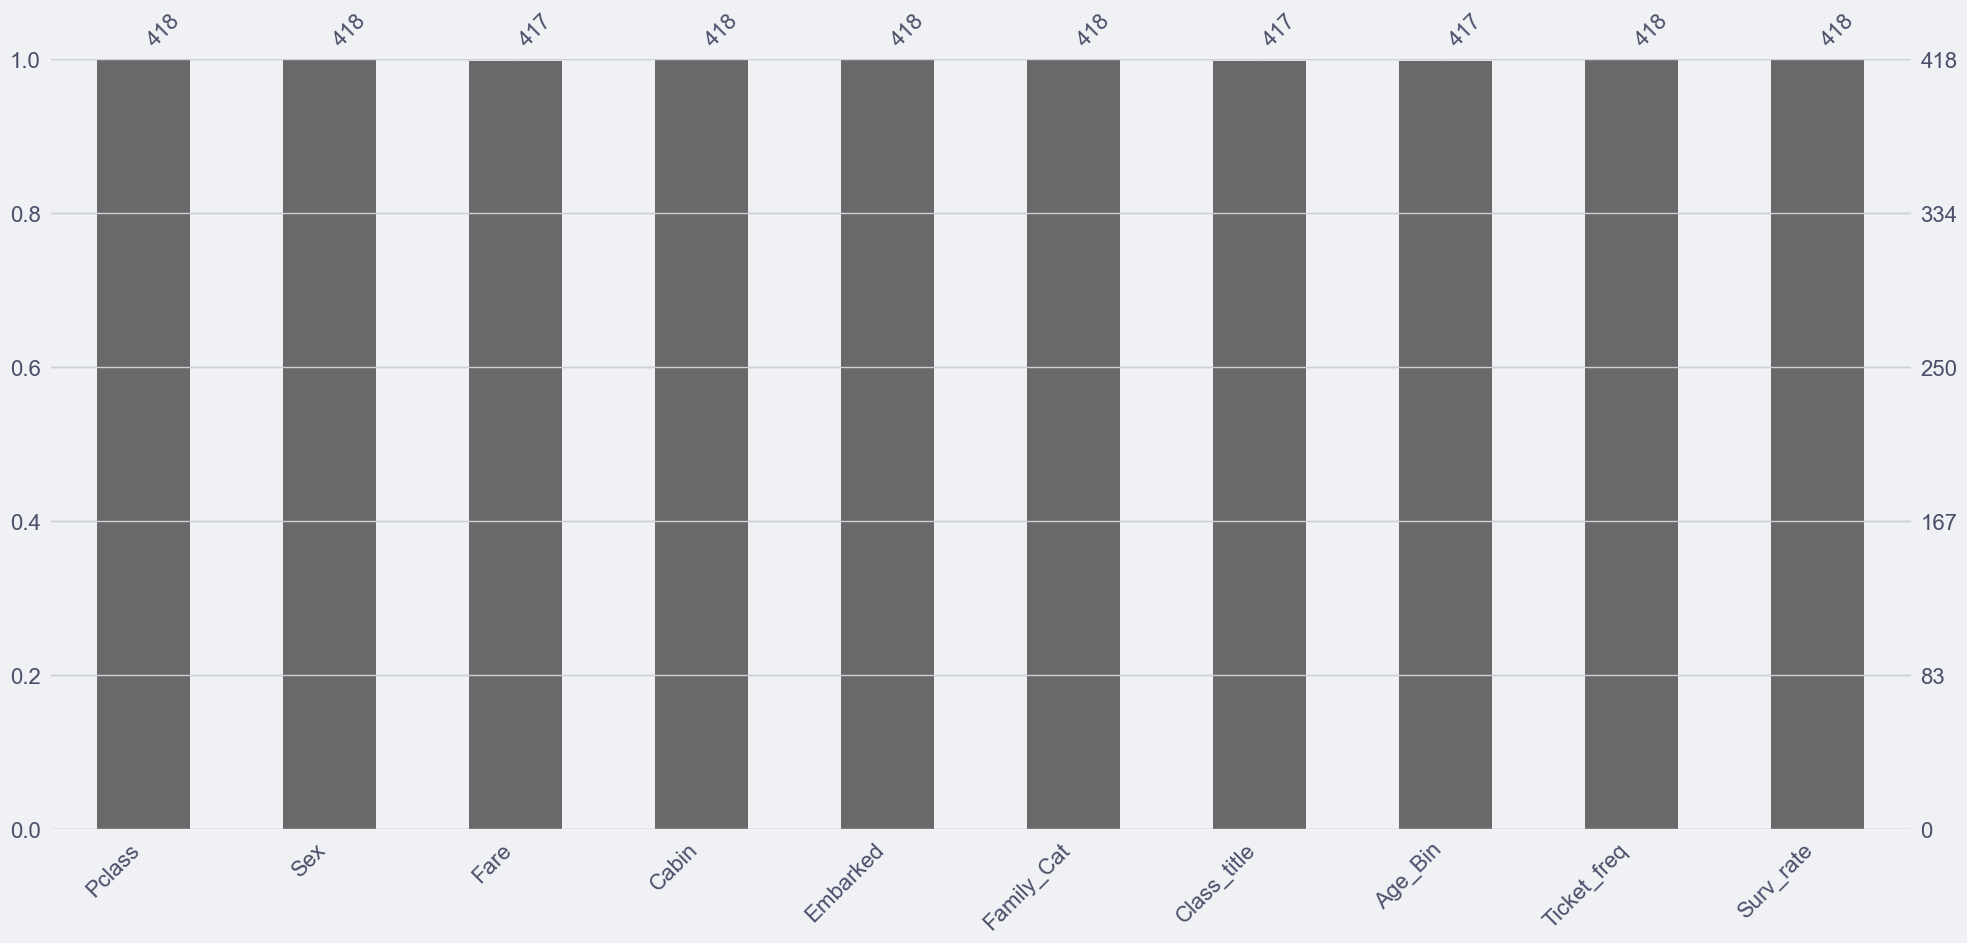

In [65]:
msno.bar(X_test)

In [66]:
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())

/var/folders/__/58jr0ft96x74h5n7dl_4rp0h0000gn/T/ipykernel_2535/3387261610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())


In [67]:
X_test.loc[X_test['Class_title'].isna()] = 0

In [68]:
X_test.loc[X_test['Age_Bin'].isna()] = 0

In [69]:
preds = neuron.predict(X_test)

In [70]:
print(preds)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 0]


In [ ]:
submit = pd.DataFrame({
  'PassengerId':test_df['PassengerId'],
  'Survived':preds
})

submit

In [ ]:
submit.to_csv('submission.csv', index=False)